In [372]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datasets import load_dataset
import scipy.stats as st
import ast

In [373]:
# Checking the working directory
import os
print(os.getcwd())

c:\Users\lisad\OneDrive\US_Data_Job_Listing_2022_to_2025


In [374]:
# Downloading the dataset

import pandas as pd

# Load Pickle version

df = pd.read_pickle(r'c:\Users\lisad\OneDrive\US_Data_Job_Listing_2022_to_2025\df_clean.pkl')

In [375]:
# Create a copy of the original DataFrame for analysis purposes

df_copy = df.copy()

In [320]:
# Display summary information on the copy of original DataFrame

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61953 entries, 0 to 61952
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           61953 non-null  int64         
 1   index                61953 non-null  int64         
 2   title                61953 non-null  object        
 3   company_name         61953 non-null  object        
 4   location             61916 non-null  object        
 5   via                  61944 non-null  object        
 6   description          61953 non-null  object        
 7   extensions           61953 non-null  object        
 8   job_id               61953 non-null  object        
 9   thumbnail            38194 non-null  object        
 10  posted_at            61763 non-null  object        
 11  schedule_type        61707 non-null  object        
 12  work_from_home       27980 non-null  object        
 13  salary               10088 non-

In [376]:
# Filter Data Frame to include only data for the year 2024

df_2024 = df_copy[df_copy['year'] == 2024].copy()

In [278]:
# Display summary information 2024 DataFrame

df_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16469 entries, 2846 to 51437
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           16469 non-null  int64         
 1   index                16469 non-null  int64         
 2   title                16469 non-null  object        
 3   company_name         16469 non-null  object        
 4   location             16459 non-null  object        
 5   via                  16469 non-null  object        
 6   description          16469 non-null  object        
 7   extensions           16469 non-null  object        
 8   job_id               16469 non-null  object        
 9   thumbnail            12185 non-null  object        
 10  posted_at            16420 non-null  object        
 11  schedule_type        16414 non-null  object        
 12  work_from_home       8723 non-null   object        
 13  salary               2766 non-nul

In [279]:
# Verifying the descriptive statistics for filtered 2024 DataFrame

df_2024.describe()

,Unnamed: 0,index,date_time,commute_time,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,year,month
count,16469.000000,16469.000000,16469,0.0,2766.00000,2581.000000,2581.000000,1326.000000,1411.000000,2766.000000,16469.0,16469.000000
mean,15551.623110,1114.941709,2024-05-14 11:00:27.364259584,NaN,54524.75351,44023.252042,67051.102077,36.702560,106698.816701,91958.738599,2024.0,4.946202
min,2846.000000,0.000000,2024-01-01 04:00:13.479853,NaN,9.00000,8.000000,10.000000,9.000000,40000.000000,18720.000000,2024.0,1.000000
25%,8397.000000,528.000000,2024-02-22 04:00:37.991475968,NaN,33.50000,20.000000,50.000000,22.695000,80000.000000,60476.000000,2024.0,2.000000
50%,13554.000000,1076.000000,2024-04-24 03:00:18.250747904,NaN,52990.25000,41705.000000,68088.000000,33.000000,100000.000000,86410.000000,2024.0,4.000000
75%,17671.000000,1674.000000,2024-07-07 03:00:11.007886080,NaN,100000.00000,80000.000000,120000.000000,47.500000,125000.000000,115000.000000,2024.0,7.000000
max,51437.000000,3227.000000,2024-12-31 04:00:09.012533,NaN,550000.00000,450000.000000,850000.000000,258.500000,550000.000000,550000.000000,2024.0,12.000000
std,10448.586592,681.705325,NaN,NaN,60634.93283,47698.628598,75118.064010,20.306962,40591.767997,44090.282453,0.0,3.301617


In [280]:
# Record keeping for filtered data from df_copy Data Frame

print(f'Filtered {len(df_2024):,} job postings for year 2024')

Filtered 16,469 job postings for year 2024


In [281]:
# Check Data Frame df_2024 filtered data validation

assert df_2024['year'].nunique() == 1 and df_2024['year'].iloc[0] == 2024

In [282]:
# Log shape changes between df_copy and df_2024 Data Frames

print(f'Original: {df_copy.shape[0]:,} rows -> 2024 subset: {df_2024.shape[0]:,} rows')

Original: 61,953 rows -> 2024 subset: 16,469 rows


## Dataset Overview

This dataset has been filtered to include only job postings from 2024. It contains cleaned data on job titles, salary information, locations, employment types, remote work options, and platforms (websites). Below is a breakdown of key metadata and the preparatory steps taken before analysis.

In [377]:
# Select and reorder relevant columns for analysis, and reset index for clarity

df_2024 = df_2024[[
'date_time','date', 'year', 'month',
'company_name', 'location','website',
'employment_type','remote_work', 
'seniority_level','clean_title',
'salary_standardized','salary_hourly', 
'salary_yearly', 'job_skills'
]].reset_index(drop=True)

df_2024.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
0,2024-11-18 04:00:07.440530,2024-11-18,2024,11,ACME AtronOmatic,Anywhere,acme atronomatic,Full-Time,True,,Data Scientist,NaN,NaN,NaN,"[sql, r, python]"
1,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Skupos,"Denver, CO",dataanalyst.com,Full-Time,False,Junior,Data Analyst,70000.0,NaN,70000.0,"[word, bigquery, redshift, excel, tableau, loo..."
2,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Progressive Insurance,United States,taleo,Full-Time,False,Senior,Data Analyst,NaN,NaN,NaN,[sql]
3,2024-11-18 04:00:07.440530,2024-11-18,2024,11,DISH,"Littleton, CO",dish careers - dish network,Full-Time,False,Senior,Data Analyst,NaN,NaN,NaN,"[pandas, redshift, tableau, airflow, r, aws, p..."
4,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Trimble,"Westminster, CO",jobs at trimble,Full-Time,False,Intern,Data Analyst,NaN,NaN,NaN,"[excel, sql, python]"


In [284]:
# Assigning the data to a new DataFrame with reset index and renamed columns

df_2024_location = df_2024['location'].value_counts().head(10).reset_index()
df_2024_location.columns = ['location', 'count']
df_2024_location


,location,count
0,Anywhere,8725
1,United States,3492
2,"Oklahoma City, OK",310
3,"Kansas City, MO",249
4,"Denver, CO",243
5,"Bentonville, AR",126
6,"Topeka, KS",124
7,"Overland Park, KS",104
8,"Jefferson City, MO",104
9,"Wichita, KS",87


## Top U.S. Locations for Data Job Listings (2024)

This bar chart displays the U.S. locations with the highest concentration of data job postings in 2024. It provides insights into where data professionals are most in demand across the country.

The data reveals that "Anywhere" and "United States" are the most frequently listed locations, likely representing remote or unspecified postings. Following these, cities such as Oklahoma City, Kansas City, and Jefferson City emerge as notable hubs for data job opportunities.

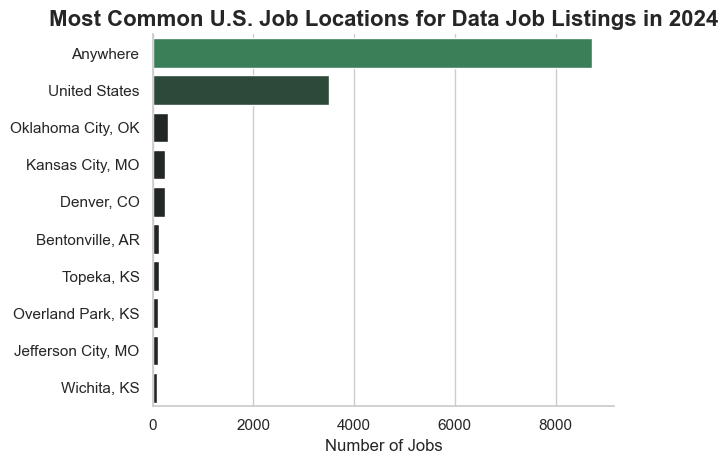

In [285]:
# Top U.S. Locations for data job interest — 2024 job market.


# Define chart style and color palette
sns.set_theme(style='whitegrid')
palette = sns.dark_palette('seagreen',n_colors=5, reverse=False, as_cmap=True)

sns.barplot(data=df_2024_location, x='count', y='location', hue='count', palette=palette, legend=False)
sns.despine()
plt.title('Most Common U.S. Job Locations for Data Job Listings in 2024', fontsize=16, fontweight='bold')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.tight_layout()
plt.show()

## Remote Work & Salary Insights for Analyst Roles (2024)

### Remote Work Availability in 2024

The pie chart below illustrates the distribution of data analyst job postings offering remote work options versus those that do not in 2024. This provides a clear overview of how flexible data roles were during that year.

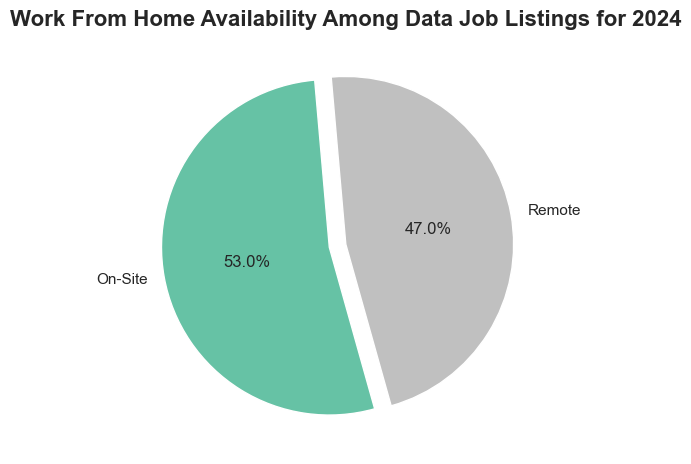

In [286]:
# Pie Chart: 2024 U.S. Data Job Listings with Remote Work Availability


# Count remote work availability categories
df_2024_pie_plot = df_2024['remote_work'].value_counts()

# Modify labels for clarity and extract slice sizes from data
labels = ['On-Site', 'Remote']
sizes = df_2024_pie_plot.values.tolist()
# Set colours to match labels
colours = ['#66c2a5', 'silver']
# Explode the first slice to emphasize it
explode = [0.1] + [0] * (len(labels) - 1)

# Plot the Pie Chart
df_2024_pie_plot.plot(kind='pie', labels=labels, startangle=95, autopct='%1.1f%%', 
              colors=colours, explode=explode, pctdistance=0.50)

# Add titles and chart formating
plt.title('Work From Home Availability Among Data Job Listings for 2024', fontsize=16, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

## Analyst Roles: Remote vs. Onsite Jobs with Salary Insights (2024)

This analysis explores how remote work flexibility correlates with median salaries for analyst roles in 2024. The horizontal bar chart below compares the median salaries between remote and onsite positions across various seniority levels

In [287]:
# Filter analyst roles with salary data

df_2024_analyst_remote_option = df_2024[df_2024['clean_title'].str.contains('analyst', case=False, na=False)
                                        & df_2024['salary_yearly'].notna()
                                        & df_2024['remote_work'].notna()
                                        & df_2024['seniority_level'].notna()
                                        ].copy()

df_2024_analyst_remote_option.sample(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
374,2024-11-14 04:00:11.193063,2024-11-14,2024,11,Vail Resorts Corporate,"Broomfield, CO",indeed,Full-Time,False,,Data Analyst,61700.0,NaN,61700.0,"[tableau, powerpoint, excel, outlook, sql, word]"
348,2024-10-12 03:00:19.471846,2024-10-12,2024,10,Centerwell,"Santa Fe, NM",Get.It,Full-Time,False,,Business Analyst,77250.0,NaN,77250.0,"[power_bi, tableau, sas, sql]"
6422,2024-02-23 04:00:21.114080,2024-02-23,2024,2,GForce Life Sciences,United States,Bebee,Temporary,False,,Clinical Data Analyst,80000.0,NaN,80000.0,"[powerpoint, word, excel, outlook]"
13308,2024-07-06 03:00:19.922498,2024-07-06,2024,7,Talentify.io,Anywhere,linkedin,Full-Time,True,,Data Analyst,104100.0,NaN,104100.0,"[python, sql]"
5106,2024-05-29 03:00:25.223530,2024-05-29,2024,5,Liberty Mutual Insurance,Anywhere,linkedin,Full-Time,True,Senior,Data Analyst,106300.0,NaN,106300.0,"[jira, sas, perl, java, hadoop, power_bi, sql,..."


In [288]:
# Strip whitespace and drop empty strings

df_2024_analyst_remote_option['seniority_level'] = (
    df_2024_analyst_remote_option['seniority_level']
    .str.strip()  
    .replace('', np.nan)  #Treat empty strings as NaN values
)

In [289]:
# Count analyst job postings by remote status

analyst_remote_count_2024 = df_2024_analyst_remote_option['remote_work'].value_counts().reset_index()
analyst_remote_count_2024

,remote_work,count
0,False,711
1,True,508


In [290]:
# Group by both remote work and seniority, and calculate median salary

analyst_median_salary_2024 = df_2024_analyst_remote_option.groupby(
    ['remote_work', 'seniority_level']
)['salary_yearly'].median().reset_index()

analyst_median_salary_2024.head(5)

,remote_work,seniority_level,salary_yearly
0,False,Director,140500.0
1,False,Executive,159000.0
2,False,Intern,40000.0
3,False,Junior,77279.5
4,False,Lead,125000.0


In [291]:
# Merge counts and median salary

analyst_median_salary_2024 = pd.merge(analyst_remote_count_2024, analyst_median_salary_2024, on='remote_work')
analyst_median_salary_2024

,remote_work,count,seniority_level,salary_yearly
0,False,711,Director,140500.0
1,False,711,Executive,159000.0
2,False,711,Intern,40000.0
3,False,711,Junior,77279.5
4,False,711,Lead,125000.0
5,False,711,Manager,134500.0
6,False,711,Mid-Level,103059.0
7,False,711,Principal,135000.0
8,False,711,Senior,108250.0
9,True,508,Intern,62962.5


In [292]:
# Renaming salary column for clarity

analyst_median_salary_2024 = analyst_median_salary_2024.rename(columns={'salary_yearly' : 'median_salary'})
analyst_median_salary_2024

,remote_work,count,seniority_level,median_salary
0,False,711,Director,140500.0
1,False,711,Executive,159000.0
2,False,711,Intern,40000.0
3,False,711,Junior,77279.5
4,False,711,Lead,125000.0
5,False,711,Manager,134500.0
6,False,711,Mid-Level,103059.0
7,False,711,Principal,135000.0
8,False,711,Senior,108250.0
9,True,508,Intern,62962.5


## Analyst Roles: Remote vs. Onsite Jobs with Salary Insights (2024)

This analysis examines how remote work flexibility correlates with median salaries for analyst roles in 2024. 
The horizontal bar chart below compares the median salaries between remote and onsite positions across various seniority levels.

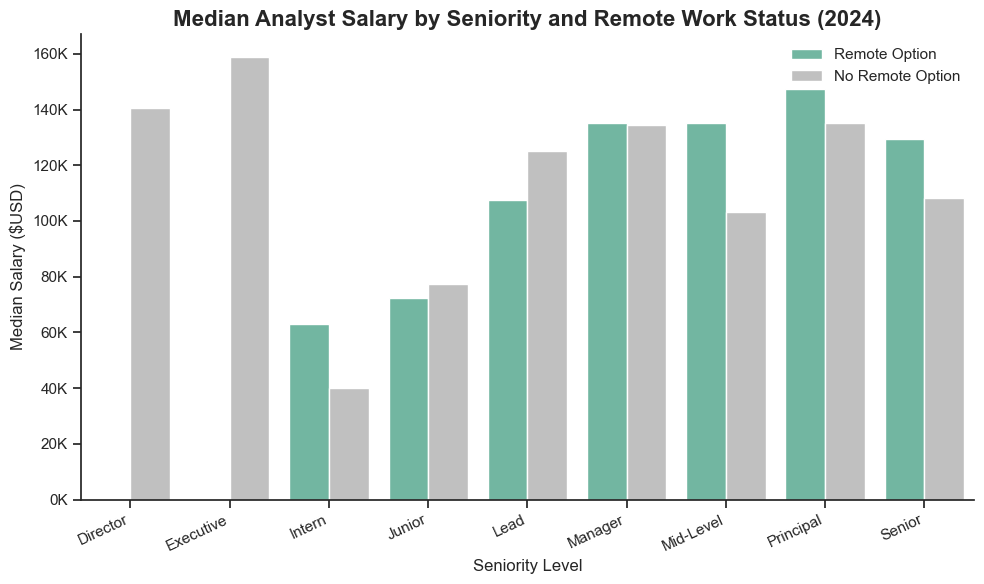

Text(0.5, -0.08, '*Note: Analyst roles with missing seniority information were excluded.This likely biased results toward executive-level remote-friendly roles,inflating salaries in the remote category.')

<Figure size 640x480 with 0 Axes>

In [293]:
# Median Salary by Remote Work Status (2024 Analyst Job Posting Roles)

# Map remote_work boolean to readable labels
label_map = {True: 'Remote Option', False: 'No Remote Option'}
analyst_median_salary_2024['remote_label'] = analyst_median_salary_2024['remote_work'].map(label_map)

# Set theme
sns.set_theme(style='ticks')
plt.figure(figsize=(10, 6))

# Plot bar chart using mapped labels and fixed hue order
ax = sns.barplot(
    data=analyst_median_salary_2024,
    x='seniority_level',
    y='median_salary',
    hue='remote_label',
    hue_order=['Remote Option', 'No Remote Option'],  # Enforce order
    palette=['#66c2a5', 'silver']   # Remote = greenish, No Remote = silver
)

# Add labels and formatting
plt.title('Median Analyst Salary by Seniority and Remote Work Status (2024)', fontsize=16, fontweight='bold')
plt.xlabel('Seniority Level')
plt.ylabel('Median Salary ($USD)')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y/1000)}K'))
plt.xticks(rotation=25, horizontalalignment='right')
sns.despine()
plt.legend(frameon=False, loc='upper right') # Format legend for better visibility
plt.tight_layout()
plt.show()

# Add footnote below chart
plt.figtext(
    0.5, -0.08,
    '*Note: Analyst roles with missing seniority information were excluded.'
    'This likely biased results toward executive-level remote-friendly roles,'
    'inflating salaries in the remote category.',
    wrap=True, ha='center', fontsize=9, style='italic'
)

# Employment Type for Data Roles (2024)
Full-Time, Part_time, contract and other work arrangement are shown in the chart below.
Understanding employment types helps identify how data jobs are being structured in 2024

In [294]:
# Prepare top 5 work arrangements for graphing

df_2024_schedule =df_2024['employment_type'].value_counts().head(10).reset_index()
df_2024_schedule.columns = ['employment_type', 'count']
df_2024_schedule

,employment_type,count
0,Full-Time,12412
1,Contract,3237
2,Part-Time,472
3,Internship,179
4,Temporary,87
5,Other,82


## Employment Types for Data Roles (2024)

The chart below illustrates the distribution of employment types—such as full-time, part-time, contract, and other work arrangements—among data roles in 2024. Understanding these employment structures provides valuable insights into how data positions are organized and the flexibility they offer.

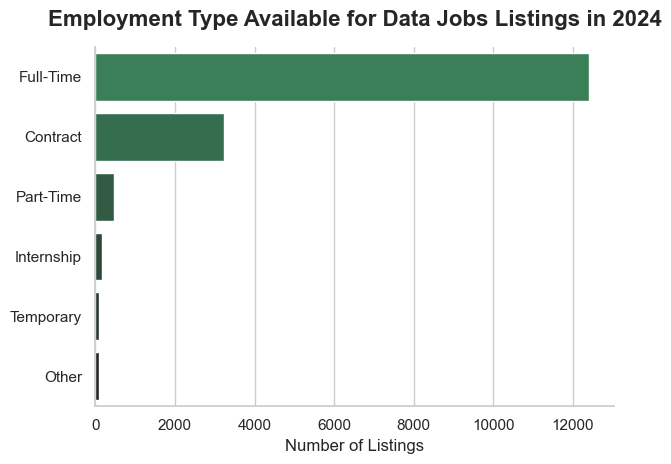

In [295]:
# Visualizing Employment Type Availability in 2024 U.S. Data Job Postings

# Define chart style and color palette
sns.set_theme(style='whitegrid')
palette = sns.dark_palette('seagreen')

# Plot the data and format chart
sns.barplot(data=df_2024_schedule,
             x='count', y='employment_type', 
             hue='count', palette=palette, legend=False)
sns.despine()
plt.title('Employment Type Available for Data Jobs Listings in 2024', 
          fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Number of Listings')
plt.ylabel('')
plt.tight_layout()
plt.show()

## Where Analyst Jobs Were Posted Most Often (2024)

This section identifies the top websites where analyst roles were posted in 2024. It also compares the posting volume and median salary per site.

In [378]:
# Filter Analyst job titles rows with valid salary and website info

df_2024_DA = df_2024[df_2024['clean_title'].str.contains('analyst', case=False, na=False)
                     & df_2024['salary_yearly'].notna()
                     & df_2024['website'].notna()
                     ].copy()
df_2024_DA.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
1,2024-11-18 04:00:07.440530,2024-11-18,2024,11,Skupos,"Denver, CO",dataanalyst.com,Full-Time,False,Junior,Data Analyst,70000.0,NaN,70000.0,"[word, bigquery, redshift, excel, tableau, loo..."
44,2024-10-24 03:00:13.975147,2024-10-24,2024,10,Leidos,United States,aijobs.net,Full-Time,False,Lead,Operations Data Analyst,142000.0,NaN,142000.0,"[powerpoint, excel, sql]"
45,2024-10-30 03:00:15.645951,2024-10-30,2024,10,Citi,United States,aijobs.net,Full-Time,False,Lead,Data Analyst,177900.0,NaN,177900.0,[]
51,2024-07-22 03:00:16.981917,2024-07-22,2024,7,Northrop Grumman,United States,built in,Full-Time,False,Principal,Data Analyst,97900.0,NaN,97900.0,"[sharepoint, excel, sap, word]"
52,2024-07-22 03:00:16.981917,2024-07-22,2024,7,Northrop Grumman,United States,built in,Full-Time,False,Principal,Data Analyst,121750.0,NaN,121750.0,"[tableau, powerpoint, jupyter, excel, sql, pyt..."


In [324]:
# Display summary information of the df_2024_DA

df_2024_DA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1219 entries, 1 to 16273
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            1219 non-null   datetime64[ns]
 1   date                 1219 non-null   object        
 2   year                 1219 non-null   int32         
 3   month                1219 non-null   int32         
 4   company_name         1219 non-null   object        
 5   location             1219 non-null   object        
 6   website              1219 non-null   object        
 7   employment_type      1219 non-null   object        
 8   remote_work          1219 non-null   bool          
 9   seniority_level      1219 non-null   object        
 10  clean_title          1219 non-null   object        
 11  salary_standardized  1219 non-null   float64       
 12  salary_hourly        0 non-null      float64       
 13  salary_yearly        1219 non-null   

In [325]:
# Verifying the descriptive statistics for df_2024_DA

df_2024_DA.describe()


,date_time,year,month,salary_standardized,salary_hourly,salary_yearly
count,1219,1219.0,1219.000000,1219.000000,0.0,1219.000000
mean,2024-05-11 23:54:34.649342976,2024.0,4.858901,102047.080693,NaN,102047.080693
min,2024-01-01 04:00:13.479853,2024.0,1.000000,40000.000000,NaN,40000.000000
25%,2024-02-18 04:00:09.920768,2024.0,2.000000,75738.087500,NaN,75738.087500
50%,2024-04-24 03:00:20.001211904,2024.0,4.000000,100000.000000,NaN,100000.000000
75%,2024-07-04 03:00:10.205963008,2024.0,7.000000,118150.000000,NaN,118150.000000
max,2024-12-31 04:00:05.934400,2024.0,12.000000,550000.000000,NaN,550000.000000
std,NaN,0.0,3.211705,38562.835235,NaN,38562.835235


In [379]:
# Calculate the number of analyst listing per website

website_2024_count_DA = df_2024_DA['website'].value_counts().head(10).reset_index()
website_2024_count_DA.columns = ['website', 'post_count']
website_2024_count_DA

,website,post_count
0,linkedin,277
1,Bebee,275
2,built in,142
3,aijobs.net,115
4,indeed,91
5,Recruiter.com,66
6,Talent.com,48
7,The Ladders,46
8,adzuna,24
9,Get.It,15


In [380]:
# Calculate analyst median salary for each website

DA_median_2024_salary = df_2024_DA.groupby('website')['salary_yearly'].median().reset_index()
DA_median_2024_salary.head(5)

,website,salary_yearly
0,Bebee,100000.0
1,Get.It,85000.0
2,JobServe,122850.0
3,Recruiter.com,100000.0
4,Talent.com,108750.0


In [381]:
# Merge the DataFrames on website

DA_top_website_with_2024_salary = pd.merge(website_2024_count_DA, DA_median_2024_salary, on='website')

In [382]:
# Renaming DataFrame columns for clarity

DA_top_website_with_2024_salary = DA_top_website_with_2024_salary.rename(columns={'salary_yearly': 'median_salary',
                                                                                  'count' : 'post_count'
                                                                        })

DA_top_website_with_2024_salary

,website,post_count,median_salary
0,linkedin,277,110000.0
1,Bebee,275,100000.0
2,built in,142,109427.5
3,aijobs.net,115,100000.0
4,indeed,91,85000.0
5,Recruiter.com,66,100000.0
6,Talent.com,48,108750.0
7,The Ladders,46,101014.0
8,adzuna,24,85812.5
9,Get.It,15,85000.0


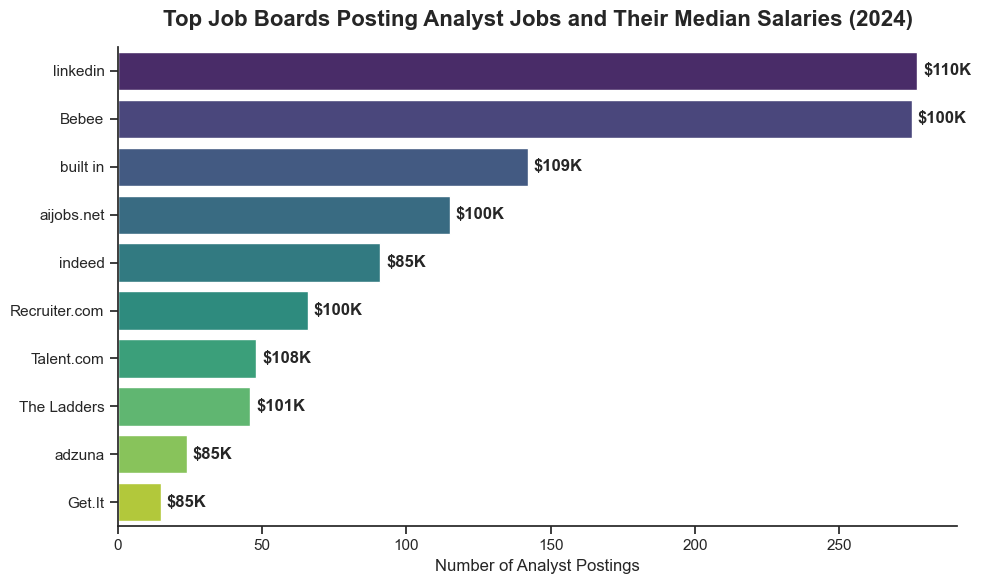

In [383]:
# Top U.S. Job Sites for Analyst Roles with 2024 Salary Data

# Set chart theme and size
sns.set_theme(style='ticks')
plt.figure(figsize=(10, 6))

# Create barplot
ax = sns.barplot(
    data=DA_top_website_with_2024_salary,
    x='post_count',
    y='website',
    hue='website',
    palette='viridis'
)

# Title and labels

plt.title('Top Job Boards Posting Analyst Jobs and Their Median Salaries (2024)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Number of Analyst Postings')
plt.ylabel('')

# Remove spines 
sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)

# Annotate with median salaries
for i, (count, salary) in enumerate(zip(
    DA_top_website_with_2024_salary['post_count'],
    DA_top_website_with_2024_salary['median_salary']
)):
    ax.text(
        count + 2,  # offset the text slightly to the right
        i,           # y-coordinate is the index
        f'${int(salary/1000):,}K',  # format salary
        va='center',
        fontsize=12,
        fontweight='semibold'
    )

plt.tight_layout()
plt.show()

## Where Data Engineer and Data Scientist Jobs Were Posted Most Often (2024)

This section identifies the top websites where Data Engineer and Data Scientist roles were posted in 2024. It also compares the posting volume and median salary per site.
This analysis provides insights into the distribution of Data Engineer and Data Scientist job postings across different platforms and the associated compensation levels.

In [384]:
# Filter job titles Data Engineer rows with valid salary and website info

df_2024_DE = df_2024[df_2024['clean_title'].str.contains('Data Engineer', case=False, na=False)
                     & df_2024['salary_yearly'].notna()
                     & df_2024['website'].notna()
                     ].copy()

df_2024_DE.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
65,2024-10-31 03:00:13.697517,2024-10-31,2024,10,TD,United States,aijobs.net,Full-Time,False,,Data Engineer,113100.0,NaN,113100.0,[sql]
71,2024-11-14 04:00:13.630541,2024-11-14,2024,11,Philips,United States,aijobs.net,Full-Time,False,,Data Engineer,116508.0,NaN,116508.0,"[azure, ssis, sql, python]"
292,2024-09-26 03:00:15.049327,2024-09-26,2024,9,InterWorks,"Stillwater, OK",adzuna,Full-Time,False,,Data Engineer,102500.0,NaN,102500.0,"[bigquery, redshift, excel, aws, snowflake, sq..."
319,2024-11-15 04:00:08.034344,2024-11-15,2024,11,MLB,"Commerce City, CO",adzuna,Full-Time,False,Lead,Data Engineer,135000.0,NaN,135000.0,"[pandas, power_bi, tableau, scikit-learn, sql,..."
1037,2024-09-20 03:00:10.933126,2024-09-20,2024,9,Jobot Consulting,"Oklahoma City, OK",linkedin,Contract,False,,Data Engineer,110000.0,NaN,110000.0,[]


In [385]:
# Display summary information of the Data Engineer DataFrame

df_2024_DE.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 65 to 16270
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            58 non-null     datetime64[ns]
 1   date                 58 non-null     object        
 2   year                 58 non-null     int32         
 3   month                58 non-null     int32         
 4   company_name         58 non-null     object        
 5   location             58 non-null     object        
 6   website              58 non-null     object        
 7   employment_type      58 non-null     object        
 8   remote_work          58 non-null     bool          
 9   seniority_level      58 non-null     object        
 10  clean_title          58 non-null     object        
 11  salary_standardized  58 non-null     float64       
 12  salary_hourly        0 non-null      float64       
 13  salary_yearly        58 non-null     f

In [386]:
# Verifying the descriptive statistics for Data Engineer DataFrame

df_2024_DE.describe()

,date_time,year,month,salary_standardized,salary_hourly,salary_yearly
count,58,58.0,58.000000,58.000000,0.0,58.000000
mean,2024-04-26 11:00:23.456018176,2024.0,4.293103,134216.336207,NaN,134216.336207
min,2024-01-05 04:00:20.600870,2024.0,1.000000,47370.000000,NaN,47370.000000
25%,2024-02-12 22:00:16.042103808,2024.0,2.000000,107050.000000,NaN,107050.000000
50%,2024-03-30 15:00:23.991350016,2024.0,3.500000,129403.750000,NaN,129403.750000
75%,2024-05-26 21:00:21.125975040,2024.0,5.000000,160000.000000,NaN,160000.000000
max,2024-12-16 04:00:08.304789,2024.0,12.000000,229500.000000,NaN,229500.000000
std,NaN,0.0,3.314025,40449.654590,NaN,40449.654590


In [388]:
# Count number of job listings for Data Engineer per website 

website_2024_count_DE = df_2024_DE['website'].value_counts().head(5).reset_index()
website_2024_count_DE.columns = ['website', 'post_count']
website_2024_count_DE

,website,post_count
0,linkedin,30
1,aijobs.net,16
2,built in,5
3,adzuna,3
4,indeed,2


In [389]:
# Calculate median salary for each of the websites with Data Engineer listings

DE_2024_median_salary = df_2024_DE.groupby('website')['salary_yearly'].median().reset_index()

In [390]:
# Merge the DataFrame: website_counts_DE, DE_median_salary, on website

DE_top_2024_website_with_salary = pd.merge(website_2024_count_DE, DE_2024_median_salary, on='website' )

In [391]:
# Renaming column for clarity

DE_top_2024_website_with_salary = DE_top_2024_website_with_salary.rename(columns={'salary_yearly': 'median_salary',
                                                                                  'count' : 'post_count'
                                                                                  })
DE_top_2024_website_with_salary

,website,post_count,median_salary
0,linkedin,30,142250.0
1,aijobs.net,16,114804.0
2,built in,5,106800.0
3,adzuna,3,135000.0
4,indeed,2,95000.0


In [392]:
# Filter job titles Data Scientist rows with valid salary and website info

df_2024_DS = df_2024[df_2024['clean_title'].str.contains('Data Scientist', case=False, na=False)
                     & df_2024['salary_yearly'].notna()
                     & df_2024['website'].notna()
                     ].copy()

df_2024_DS.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
12,2024-11-07 04:00:09.607799,2024-11-07,2024,11,KODA Technologies Inc.,Colorado,dice,Full-Time,False,,Data Scientist,127500.0,NaN,127500.0,"[aws, azure, sql, word, r, python]"
16,2024-11-06 04:00:14.815511,2024-11-06,2024,11,Nielsen,United States,simplify jobs,Full-Time,False,Senior,Data Scientist,96500.0,NaN,96500.0,"[powerpoint, excel, sap, spreadsheet]"
43,2024-10-31 03:00:13.697517,2024-10-31,2024,10,Voya Financial,United States,aijobs.net,Full-Time,False,,Data Scientist,43000.0,NaN,43000.0,"[azure, mssql, c++, git, r, python]"
64,2024-10-15 03:00:17.895005,2024-10-15,2024,10,Gartner,United States,aijobs.net,Full-Time,False,Senior,Data Scientist,113000.0,NaN,113000.0,"[power_bi, excel, spark, go, sql, python]"
105,2024-10-23 03:00:16.316997,2024-10-23,2024,10,"HP Development Company, L.P.","Air Force Academy, CO",The Ladders,Full-Time,False,Principal,Data Scientist,174000.0,NaN,174000.0,"[sql, python]"


In [393]:
# Display summary information of the Data Scientist DataFrame

df_2024_DS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, 12 to 16247
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            128 non-null    datetime64[ns]
 1   date                 128 non-null    object        
 2   year                 128 non-null    int32         
 3   month                128 non-null    int32         
 4   company_name         128 non-null    object        
 5   location             128 non-null    object        
 6   website              128 non-null    object        
 7   employment_type      128 non-null    object        
 8   remote_work          128 non-null    bool          
 9   seniority_level      128 non-null    object        
 10  clean_title          128 non-null    object        
 11  salary_standardized  128 non-null    float64       
 12  salary_hourly        0 non-null      float64       
 13  salary_yearly        128 non-null    

In [394]:
# Verifying the descriptive statistics for Data Scientist DataFrame 

df_2024_DS.describe()

,date_time,year,month,salary_standardized,salary_hourly,salary_yearly
count,128,128.0,128.000000,128.000000,0.0,128.000000
mean,2024-05-12 13:26:09.730808320,2024.0,4.890625,138089.796875,NaN,138089.796875
min,2024-01-04 04:00:34.146109,2024.0,1.000000,43000.000000,NaN,43000.000000
25%,2024-02-18 04:00:23.894641920,2024.0,2.000000,107475.000000,NaN,107475.000000
50%,2024-03-30 15:00:17.224763904,2024.0,3.000000,140312.500000,NaN,140312.500000
75%,2024-07-07 09:00:11.231569920,2024.0,7.000000,165000.000000,NaN,165000.000000
max,2024-12-20 04:00:08.033640,2024.0,12.000000,273500.000000,NaN,273500.000000
std,NaN,0.0,3.416575,40972.070976,NaN,40972.070976


In [395]:
# Count number of job listings for Data Scientist per website 

website_2024_count_DS = df_2024_DS['website'].value_counts().head(5).reset_index()
website_2024_count_DS

,website,count
0,linkedin,68
1,aijobs.net,36
2,The Ladders,11
3,Bebee,4
4,built in,2


In [396]:
# Calculate median salary for each of the websites

DS_median_2024_salary = df_2024_DS.groupby('website')['salary_yearly'].median().reset_index()
DS_median_2024_salary

,website,salary_yearly
0,Bebee,75000.0
1,Get.It,114650.0
2,Recruiter.com,135372.5
3,The Ladders,125552.5
4,adzuna,123000.0
5,aijobs.net,127000.0
6,built in,138750.0
7,dice,127500.0
8,indeed,100000.0
9,linkedin,146000.0


In [397]:
# Merge the DataFrame: website_counts_DS, DS_median_salary, on website

DS_top_website_with_2024_salary = pd.merge(website_2024_count_DS, DS_median_2024_salary, on='website' )
DS_top_website_with_2024_salary

,website,count,salary_yearly
0,linkedin,68,146000.0
1,aijobs.net,36,127000.0
2,The Ladders,11,125552.5
3,Bebee,4,75000.0
4,built in,2,138750.0


In [398]:
# Renaming column for clarity

DS_top_website_with_2024_salary = DS_top_website_with_2024_salary.rename(columns={'salary_yearly': 'median_salary',
                                                                        'count' : 'post_count'
                                                                        })
DS_top_website_with_2024_salary       

,website,post_count,median_salary
0,linkedin,68,146000.0
1,aijobs.net,36,127000.0
2,The Ladders,11,125552.5
3,Bebee,4,75000.0
4,built in,2,138750.0


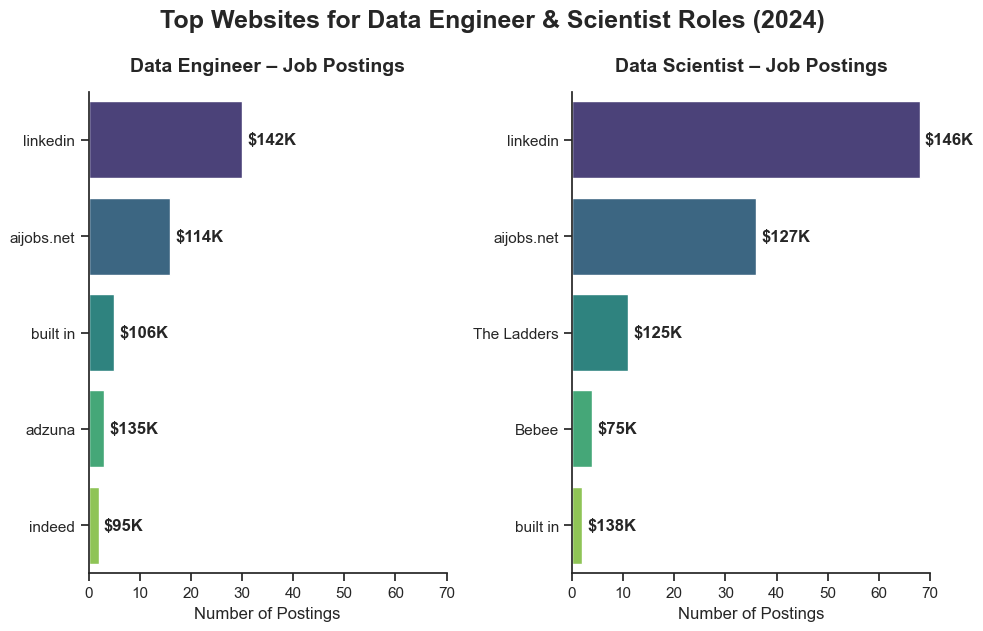

In [399]:
# Top U.S. Job Sites for Data Engineer and Data Scientist Roles with 2024 Salary Data


# Create summary DataFrames for DE & DS
DE_summary = DE_top_2024_website_with_salary.copy()
DE_summary['Role'] = 'Data Engineer'

# Create dummy DS data or use your real filtered df_2024_DS
DS_summary = DS_top_website_with_2024_salary.copy()
DS_summary['Role'] = 'Data Scientist'

# Combine into one DataFrame
combined_summary = pd.concat([DE_summary, DS_summary])

# Plot subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharex=False)

# Remove spines 
sns.despine()

# Annotation of Data Engineer and Data Scientist roles
for ax, role in zip(axes, combined_summary['Role'].unique()):
    subset = combined_summary[combined_summary['Role'] == role]
    sns.barplot(data=subset, x='post_count', y='website', hue='website', ax=ax, palette='viridis')
    ax.set_title(f'{role} – Job Postings', fontsize=14, fontweight='semibold', pad=15)
    ax.set_xlabel('Number of Postings')
    ax.set_xlim(0, 70)
    ax.set_ylabel('')
  
    # Annotation Median Salary for Roles
    for i, (count, salary) in enumerate(zip(subset['post_count'], subset['median_salary'])):
        ax.text(count + 1, i, f'${int(salary/1000):,}K', va='center', fontsize=12, fontweight='semibold')
        

plt.tight_layout()
plt.suptitle('Top Websites for Data Engineer & Scientist Roles (2024)', fontsize=18, fontweight='bold', y=1.05)
plt.show()